# BUSINESS MODEL FOR UBER FARE PRICING


## Load and Explore the Dataset


In [1]:
# Import required libraries/packages

import numpy as np
import pandas as pd

import warnings # To supress unnecessary warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from haversine import haversine, Unit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read the dataset
df_u= pd.read_csv(r"D:\DIGANTH RAI\upgrad\uber rides dataset\uber.csv")

In [4]:
# Look at the first few entries
df_u.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df_u.shape

(200000, 9)

In [6]:
df_u.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
# Check the info to see the types of the feature variables and the null values present
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


###  Handling Null Values

In [8]:
# Drop the rows with null values
df_u.dropna(inplace=True)

In [9]:
df_u.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Convert data types: Convert the pickup_datetime and key column to datetime format for easier manipulation

In [10]:
# Convert pickup_datetime column to datetime format
df_u['pickup_datetime'] = pd.to_datetime(df_u['pickup_datetime'])

In [11]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [12]:
df_u['key'] = pd.to_datetime(df_u['key'])

## EDA

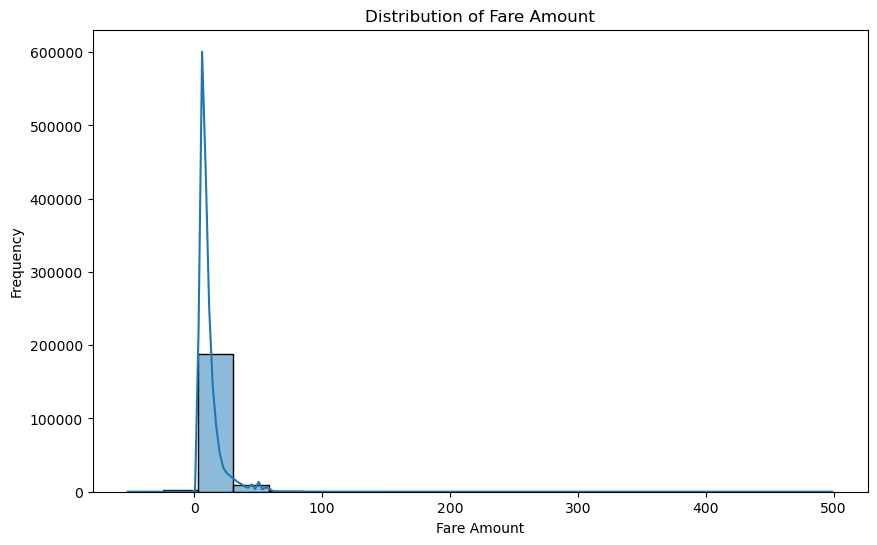

In [13]:
# Histogram for fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df_u['fare_amount'], bins=20, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

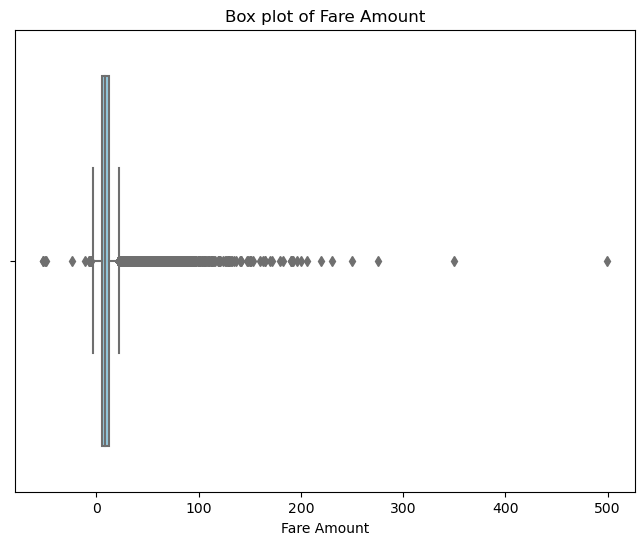

In [14]:
# Plotting a box plot to visualize outliers in fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=df_u, color='skyblue')
plt.title('Box plot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_u['fare_amount'].quantile(0.25)
Q3 = df_u['fare_amount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out rows with fare_amount within the winsorized range
df = df_u[(df_u['fare_amount'] >= lower_limit) & (df_u['fare_amount'] <= upper_limit)]

# Reset index if needed
df.reset_index(drop=True, inplace=True)



In [16]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


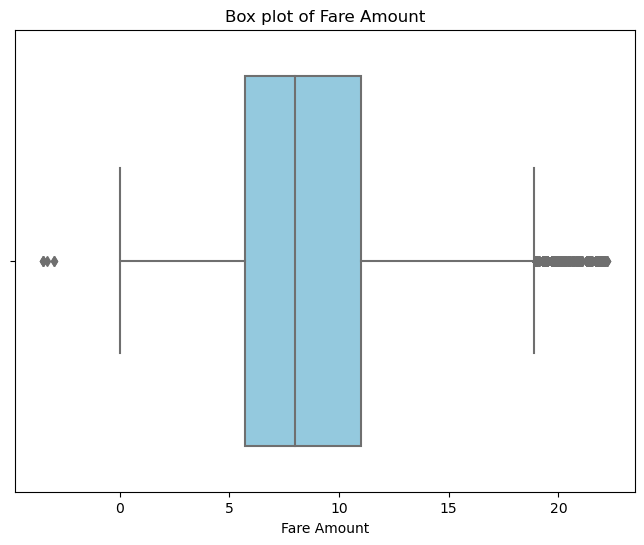

In [17]:
# Plotting a box plot to visualize outliers in fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=df, color='skyblue')
plt.title('Box plot of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

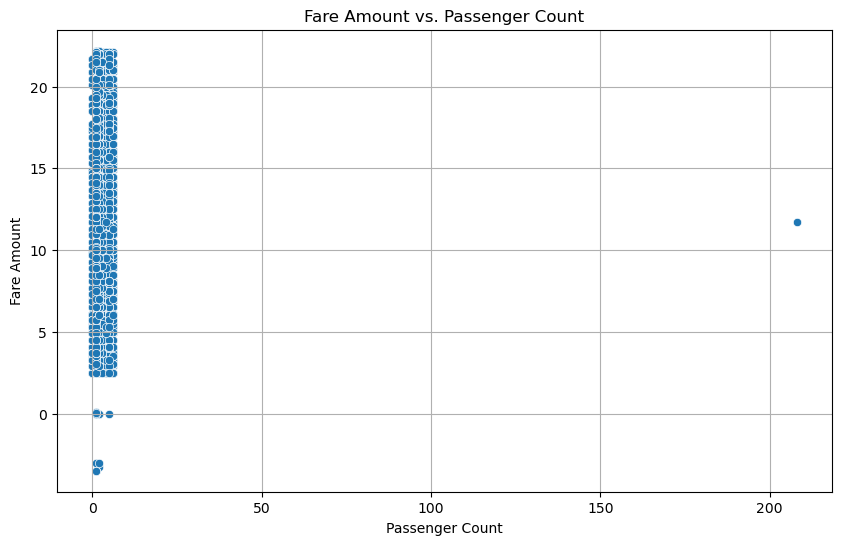

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [19]:
# Drop rows passenger count is greater than 50
df = df[df['passenger_count'] <= 50]

In [20]:
# Define the valid range for latitude and longitude
valid_lat_range = (-90, 90)
valid_lon_range = (-180, 180)

# Create boolean masks for rows where latitude and longitude are within the valid range
valid_lat_mask = (df['pickup_latitude'].between(*valid_lat_range)) & (df['dropoff_latitude'].between(*valid_lat_range))
valid_lon_mask = (df['pickup_longitude'].between(*valid_lon_range)) & (df['dropoff_longitude'].between(*valid_lon_range))

# Combine the masks using logical AND to get the final mask
valid_mask = valid_lat_mask & valid_lon_mask

# Filter the DataFrame to keep only rows where both latitude and longitude are within the valid range
df_filtered = df[valid_mask].copy()

In [21]:
df_filtered['distance_km'] = df_filtered.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']),
                                                   unit=Unit.KILOMETERS), axis=1)


In [22]:
df_filtered.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


In [23]:
df_filtered.shape

(182821, 10)

In [24]:
df_filtered.describe()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.828210e+05,182821,182821.000000,182821.000000,182821.000000,182821.000000,182821.000000,182821.000000,182821.000000
mean,2.770858e+07,2012-03-07 17:05:09.075144960,8.940010,-72.520746,39.929520,-72.530852,39.934584,1.680316,17.891504
min,1.000000e+00,2009-01-01 01:15:22.000000600,-3.500000,-93.824668,-74.009697,-75.458979,-74.015750,0.000000,0.000000
25%,1.382073e+07,2010-08-09 15:59:06,5.700000,-73.992355,40.735718,-73.991660,40.735288,1.000000,1.162488
50%,2.774626e+07,2012-02-28 14:34:00.000000768,8.000000,-73.982242,40.752542,-73.980831,40.753202,1.000000,1.960698
75%,4.154167e+07,2013-10-01 12:46:00.000000256,11.000000,-73.969055,40.766500,-73.966669,40.767383,2.000000,3.282538
max,5.542357e+07,2015-06-30 23:33:33.000000200,22.200000,40.808425,48.018760,40.831932,45.031598,6.000000,8782.910738
std,1.600997e+07,NaN,4.143232,10.389825,6.062051,10.348090,6.045786,1.305457,357.387189


In [25]:
# Outliers in distance
# Calculate the interquartile range (IQR)
Q1 = df_filtered['distance_km'].quantile(0.25)
Q3 = df_filtered['distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with distances outside the bounds
df_filtered = df_filtered[(df_filtered['distance_km'] >= lower_bound) & (df_filtered['distance_km'] <= upper_bound)]


Peak Traffic Hours (Based on Uber Pickups):
 Hour
0     0.037769
1     0.028063
2     0.020982
3     0.015126
4     0.009878
5     0.007838
6     0.019446
7     0.036108
8     0.046467
9     0.048065
10    0.045791
11    0.048111
12    0.050816
13    0.050810
14    0.048724
15    0.048151
16    0.041436
17    0.049309
18    0.062120
19    0.065575
20    0.059714
21    0.057450
22    0.054454
23    0.047796
dtype: float64


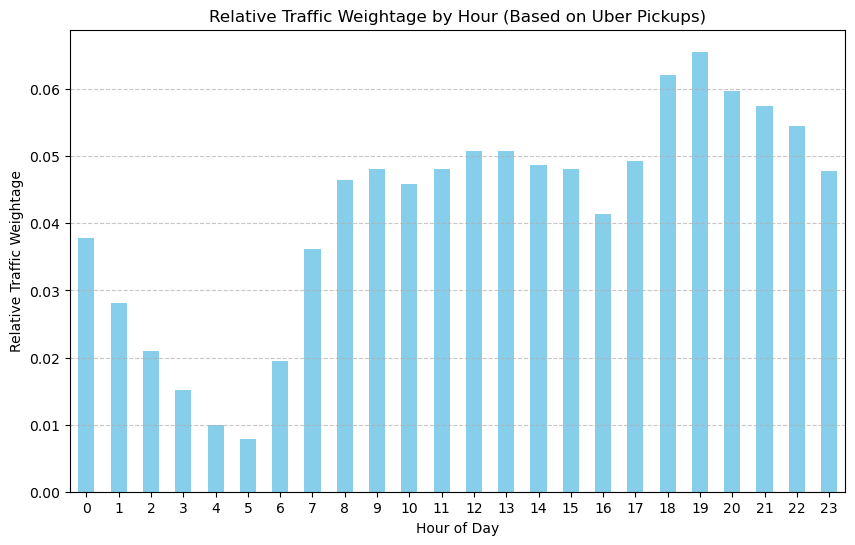

In [26]:
df_filtered['Hour'] = df_filtered['pickup_datetime'].dt.hour
hourly_pickups = df_filtered.groupby('Hour').size()
normalized_traffic_weightage = hourly_pickups / hourly_pickups.sum()
df_filtered['Traffic_Weitage'] = df_filtered['Hour'].map(normalized_traffic_weightage)
print("Peak Traffic Hours (Based on Uber Pickups):\n", normalized_traffic_weightage)

plt.figure(figsize=(10, 6))
normalized_traffic_weightage.plot(kind='bar', color='skyblue')
plt.title('Relative Traffic Weightage by Hour (Based on Uber Pickups)')
plt.xlabel('Hour of Day')
plt.ylabel('Relative Traffic Weightage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


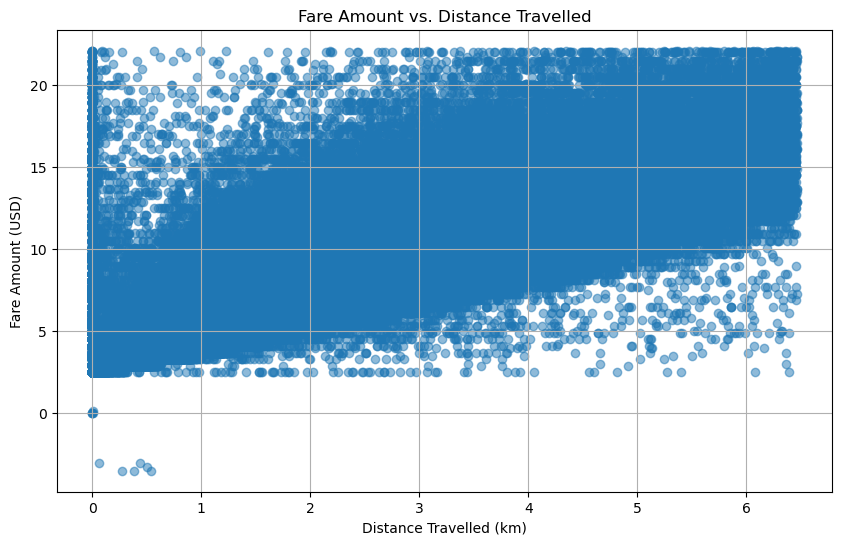

In [27]:
# Creating scatter plot for fare amount vs. distance travelled
plt.figure(figsize=(10, 6))  
plt.scatter(df_filtered['distance_km'], df_filtered['fare_amount'], alpha=0.5)  
plt.title('Fare Amount vs. Distance Travelled')  
plt.xlabel('Distance Travelled (km)')  
plt.ylabel('Fare Amount (USD)')  
plt.grid(True)  
plt.show() 

In [28]:
# Drop rows with fare amount less than 0
df_filtered = df_filtered[df_filtered['fare_amount'] >= 0]


In [29]:
df_filtered.shape

(174527, 12)

In [30]:
df_filtered.describe()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,Hour,Traffic_Weitage
count,1.745270e+05,174527,174527.000000,174527.000000,174527.000000,174527.000000,174527.000000,174527.000000,174527.000000,174527.000000,174527.000000
mean,2.770404e+07,2012-03-13 14:02:46.615120128,8.549848,-72.531670,39.930886,-72.530469,39.930958,1.681253,2.218701,13.593123,0.047885
min,4.500000e+01,2009-01-01 01:15:22.000000600,0.000000,-75.387785,-74.009697,-75.375315,-74.009857,0.000000,0.000000,0.000000,0.007838
25%,1.380798e+07,2010-08-13 20:30:46.500000,5.700000,-73.992235,40.736452,-73.991677,40.736148,1.000000,1.131341,9.000000,0.045791
50%,2.773330e+07,2012-03-08 18:05:00.000000256,7.700000,-73.982208,40.752682,-73.981110,40.753212,1.000000,1.876570,14.000000,0.048151
75%,4.154566e+07,2013-10-09 08:27:46.000000256,10.500000,-73.969293,40.766371,-73.967766,40.766806,2.000000,3.030189,19.000000,0.054454
max,5.542357e+07,2015-06-30 23:33:33.000000200,22.100000,40.808425,45.031653,40.831932,45.031598,6.000000,6.462284,23.000000,0.065575
std,1.601549e+07,NaN,3.728585,10.354549,6.061558,10.354389,6.061572,1.306448,1.454557,6.432262,0.012082


In [31]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174527 entries, 0 to 182832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         174527 non-null  int64              
 1   key                174527 non-null  datetime64[ns]     
 2   fare_amount        174527 non-null  float64            
 3   pickup_datetime    174527 non-null  datetime64[ns, UTC]
 4   pickup_longitude   174527 non-null  float64            
 5   pickup_latitude    174527 non-null  float64            
 6   dropoff_longitude  174527 non-null  float64            
 7   dropoff_latitude   174527 non-null  float64            
 8   passenger_count    174527 non-null  int64              
 9   distance_km        174527 non-null  float64            
 10  Hour               174527 non-null  int32              
 11  Traffic_Weitage    174527 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime

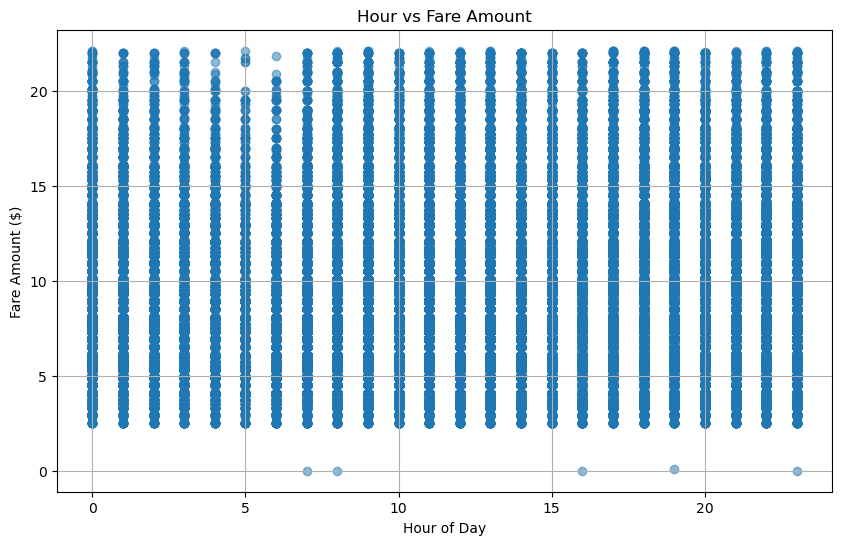

In [32]:
# Plot graph between hour and fare amount
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Hour'], df_filtered['fare_amount'], alpha=0.5)
plt.title('Hour vs Fare Amount')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


In [33]:
df_filtered.drop(columns=['Unnamed: 0', 'key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df_filtered.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage
0,7.5,2015-05-07 19:52:06+00:00,1,1.683325,19,0.065575
1,7.7,2009-07-17 20:04:56+00:00,1,2.457593,20,0.059714
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,0.057450
3,5.3,2009-06-26 08:22:21+00:00,3,1.661686,8,0.046467
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,0.049309


In [34]:
# Convert 'pickup_datetime' to datetime type
df_filtered['pickup_datetime'] = pd.to_datetime(df_filtered['pickup_datetime'])

# Extract pickup dates
df_filtered['pickup_date'] = df_filtered['pickup_datetime'].dt.date

# Obtain weekdays and convert them to day names
df_filtered['weekday'] = df_filtered['pickup_datetime'].dt.day_name()

In [35]:
df_filtered.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage,pickup_date,weekday
0,7.5,2015-05-07 19:52:06+00:00,1,1.683325,19,0.065575,2015-05-07,Thursday
1,7.7,2009-07-17 20:04:56+00:00,1,2.457593,20,0.059714,2009-07-17,Friday
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,0.057450,2009-08-24,Monday
3,5.3,2009-06-26 08:22:21+00:00,3,1.661686,8,0.046467,2009-06-26,Friday
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,0.049309,2014-08-28,Thursday


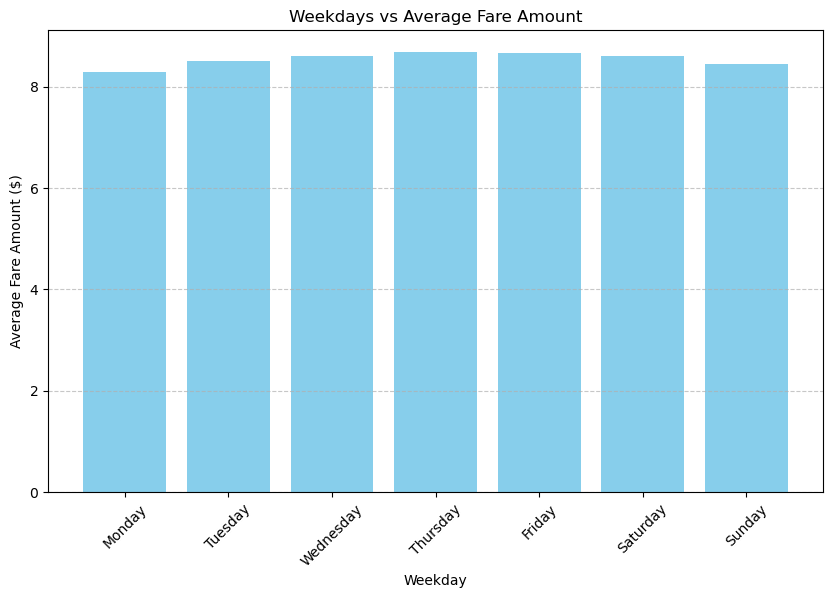

In [36]:
import matplotlib.pyplot as plt

# Grouping by weekdays and calculating mean fare
weekday_stats = df_filtered.groupby('weekday')['fare_amount'].mean().reset_index()

# Sorting by weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['weekday'] = pd.Categorical(weekday_stats['weekday'], categories=weekday_order, ordered=True)
weekday_stats.sort_values('weekday', inplace=True)

# Plotting bar graph for weekdays vs fare
plt.figure(figsize=(10, 6))
plt.bar(weekday_stats['weekday'], weekday_stats['fare_amount'], color='skyblue')
plt.title('Weekdays vs Average Fare Amount')
plt.xlabel('Weekday')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Average fare  is highest during mid weeks

In [37]:
# Drop 'pickup_date' and 'pickup_datetime' columns
df_filtered.drop(['pickup_date', 'pickup_datetime'], axis=1, inplace=True)

# Convert 'weekday' column to category type
df_filtered['weekday'] = df_filtered['weekday'].astype('category')

In [38]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174527 entries, 0 to 182832
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   fare_amount      174527 non-null  float64 
 1   passenger_count  174527 non-null  int64   
 2   distance_km      174527 non-null  float64 
 3   Hour             174527 non-null  int32   
 4   Traffic_Weitage  174527 non-null  float64 
 5   weekday          174527 non-null  category
dtypes: category(1), float64(3), int32(1), int64(1)
memory usage: 7.5 MB


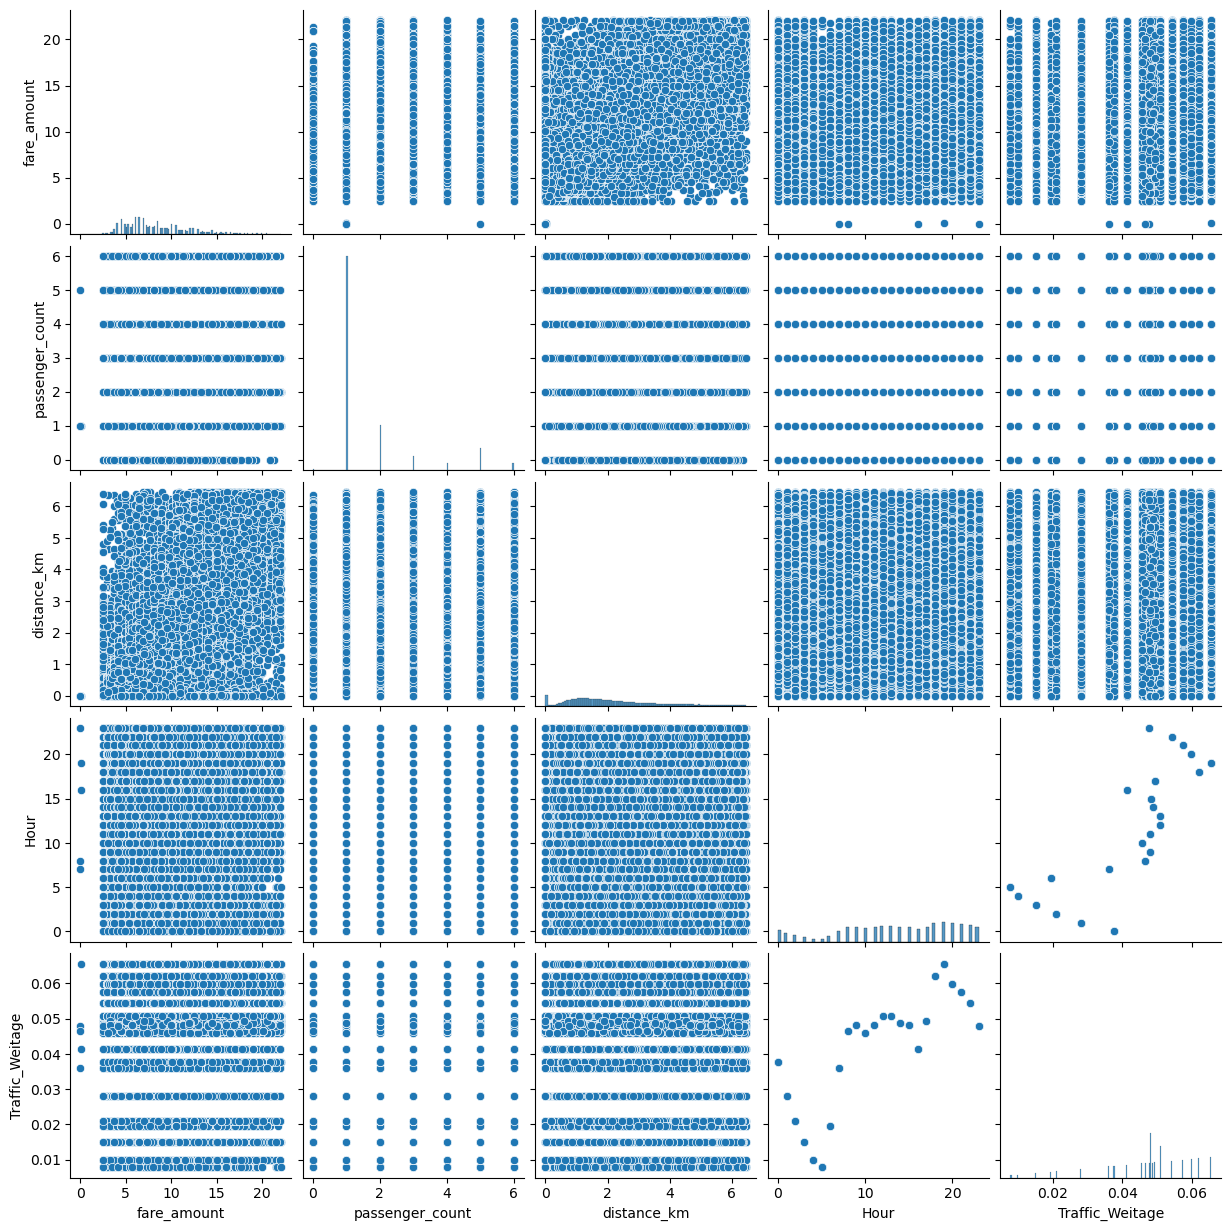

In [39]:
sns.pairplot(df_filtered)

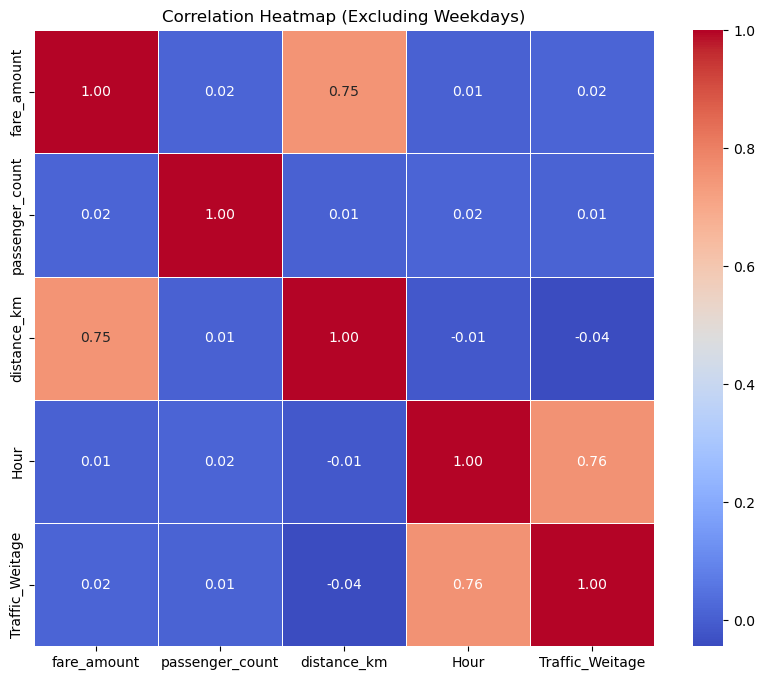

In [40]:
# Selecting only numeric columns for the correlation matrix
numeric_columns = ['fare_amount', 'passenger_count', 'distance_km', 'Hour', 'Traffic_Weitage']

# Calculating the correlation matrix for numeric columns of the DataFrame df_filtered
correlation_matrix = df_filtered[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Weekdays)')
plt.show()


##  As the distance increases fare price also  increases and they are highly correlated

## Dummy varriables
To create dummy variables for weekdays in pandas, you can use the get_dummies() function. 

In [41]:
# Create dummy variables for weekdays
weekday_dummies = pd.get_dummies(df_filtered['weekday'])

# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df_filtered, weekday_dummies], axis=1)

# Drop the original 'weekday' column as it is no longer needed
df_with_dummies.drop('weekday', axis=1, inplace=True)


In [42]:
# Convert boolean columns to integers
df_with_dummies['Friday'] = df_with_dummies['Friday'].astype(int)
df_with_dummies['Monday'] = df_with_dummies['Monday'].astype(int)
df_with_dummies['Saturday'] = df_with_dummies['Saturday'].astype(int)
df_with_dummies['Sunday'] = df_with_dummies['Sunday'].astype(int)
df_with_dummies['Thursday'] = df_with_dummies['Thursday'].astype(int)
df_with_dummies['Tuesday'] = df_with_dummies['Tuesday'].astype(int)
df_with_dummies['Wednesday'] = df_with_dummies['Wednesday'].astype(int)


#  Splitting the Data into Training and Testing Sets

In [47]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(0)

# Perform train-test split
df_train, df_test = train_test_split(df_with_dummies, train_size=0.7, test_size=0.3, random_state=100)

# Check the shapes of the resulting dataframes
print("Shape of training data:", df_train.shape)
print("Shape of testing data:", df_test.shape)


Shape of training data: (122168, 12)
Shape of testing data: (52359, 12)


In [48]:
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
cols_to_scale = ['fare_amount', 'passenger_count', 'distance_km', 'Hour', 'Traffic_Weitage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

# Display the scaled data
print(df_train.head())


        fare_amount  passenger_count  distance_km      Hour  Traffic_Weitage  \
29833      1.589094        -0.522152     0.637077  0.062725         0.068165   
60242      0.251775        -0.522152    -0.098746 -0.559267        -0.175057   
96409     -0.550617         0.240999    -0.176751  1.151209         0.791655   
129819     0.118043        -0.522152    -0.641977  0.684716         1.178815   
97086     -0.764588         1.004150    -0.477009  0.684716         1.178815   

        Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
29833        0       0         0       0         0        0          1  
60242        0       0         1       0         0        0          0  
96409        0       0         1       0         0        0          0  
129819       0       1         0       0         0        0          0  
97086        0       0         0       0         0        1          0  


In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Print correlation coefficients with respect to the target variable (fare_amount)
print(correlation_matrix['fare_amount'].sort_values(ascending=False))


fare_amount        1.000000
distance_km        0.756247
Traffic_Weitage    0.017901
passenger_count    0.016986
Thursday           0.016792
Friday             0.013399
Wednesday          0.007550
Hour               0.005859
Saturday           0.004862
Tuesday           -0.006760
Sunday            -0.012316
Monday            -0.026501
Name: fare_amount, dtype: float64


# Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('fare_amount')
X_train = df_train

## Step 5: Building a linear model

In [51]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['distance_km']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [52]:
# Check the parameters obtained

lr.params

const          4.248491
distance_km    1.940622
dtype: float64

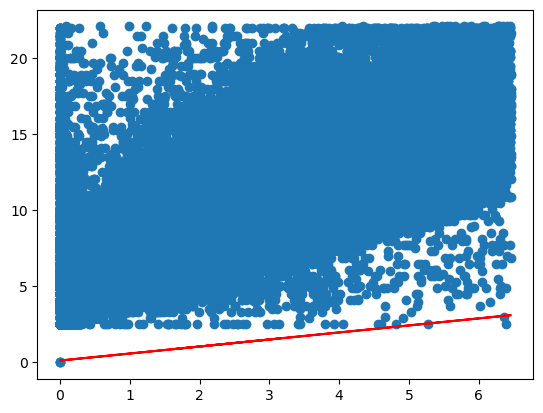

In [53]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()